In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
# Variables that should be categorical
df['Star Ratings'] = df['Star Ratings'].astype('category')
df['animal'] = df['animal'].astype('category')
df['subcategory'] = df['subcategory'].astype('category')
df['food_type'] = df['food_type'].astype('category')

In [4]:
def to_lowercase(text):
    return text.lower()

def normalize_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def strip_trailing_whitespaces(text):
    return text.strip()


df['Formats'] = df['Formats'].apply(to_lowercase)
df['Formats'] = df['Formats'].apply(strip_trailing_whitespaces)
df['Formats'] = df['Formats'].apply(normalize_spaces)
df['Formats'] = df['Formats'].str.replace('.', ',') 

# We initialize a dictionary to map product names to IDs
product_id_map = {}
current_id = 1

def get_product_id(product_name):
    global current_id
    if product_name not in product_id_map:
        product_id_map[product_name] = current_id
        current_id += 1
    return product_id_map[product_name]



# We apply the function to create a new 'product_id' column
df['product_id'] = df['Name'].apply(get_product_id)

# We create the 'Pack' column
df['Pack'] = df['Formats'].str.contains('pack', case=False)

In [5]:
# Function to determine the package value
def find_package(format_str):
    if 'bolsa' in format_str:
        return 'bolsa'
    elif 'saco' in format_str:
        return 'saco'
    elif 'lata' in format_str:
        return 'lata'
    elif 'latas' in format_str:
        return 'lata'
    elif 'sacos' in format_str:
        return 'saco'
    elif 'sobre' in format_str:
        return 'sobre'
    elif 'pouches' in format_str:
        return 'pouch'
    else:
        return "not_specified"

# Applying the function to create the 'package' column
df['Package'] = df['Formats'].apply(find_package)

Check the amount of ceros, null values and empty strings

In [6]:
# Null values
null_counts = df.isnull().sum()
print("Valores nulos por columna:")
print(null_counts)

# value = 0
zero_counts = (df == 0).sum()
print("\nValores cero por columna:")
print(zero_counts)

# Empty strings
empty_string_counts = (df == '').sum()
print("\nValores vacíos (strings vacíos) por columna:")
print(empty_string_counts)

Valores nulos por columna:
Name             0
Formats          0
Price           13
Kg price        98
Star Ratings     0
Description      0
animal           0
food_type        0
subcategory      0
product_id       0
Pack             0
Package          0
dtype: int64

Valores cero por columna:
Name              0
Formats           0
Price             0
Kg price          0
Star Ratings    408
Description       0
animal            0
food_type         0
subcategory       0
product_id        0
Pack            874
Package           0
dtype: int64

Valores vacíos (strings vacíos) por columna:
Name            0
Formats         0
Price           0
Kg price        0
Star Ratings    0
Description     0
animal          0
food_type       0
subcategory     0
product_id      0
Pack            0
Package         0
dtype: int64


In [7]:
# Transform the variables 'Price' and 'Kg price' to float
df['Price'] = df['Price'].str.replace('€', '').astype(float)
df['Kg price'] = df['Kg price'].str.replace('€/kg', '').astype(float)

In [8]:
df['animal'] = df['animal'].str.replace('peros', 'perros')

We take the 'Formats' column and extract the total weight of the packages, to be able to do that we unified the formats so that we can eliminate small differences between same type of formats.

In [9]:
# Number of initial formats
unique_values_count = df['Formats'].nunique()
print(f"Total number of unique values in 'Formats': {unique_values_count}")

df['Formats'].unique()

Total number of unique values in 'Formats': 136


array(['pack 12 x bolsa de 85 gr', 'pack 10 x 75 gr',
       'pack 12 latas 85 gr', 'pack 24 x lata de 85 gr',
       'pack 24 latas 85 gr', 'pack 10 x bolsa de 85 gr',
       'pack 26 x pouches de 85 gr', 'pack 7 x tarrina de 100 gr',
       'lata de 156 g,', 'pack 24 latas 156 gr',
       'pack 24 x lata de 70 gr', 'pack 12 latas x 185g',
       'pack 14 x lata 85 gr', 'pack 20 x sobre 85 gr',
       'pack 6 x lata de 50 gr', 'saco de 2,5 kg', 'saco de 10 kg',
       'saco de 1,5 kg', 'saco de 3 kg', 'pack 2 x 1,5 kg',
       'saco de 12 kg', 'pack 2 x saco de 12 kg', 'bolsa de 300 gr',
       'saco de 7 kg', 'pack 2 x saco de 10 kg', 'bolsa de 400 gr',
       'saco de 2 kg', 'saco de 3,5 kg', 'pack 2 x 3,5 kg',
       'saco de 4 kg', 'pack 2 x 4 kg', '1,5 kg', 'pack 2 x saco de 3 kg',
       'pack 2 x 10 kg', 'saco de 8 kg', 'pack 2 x saco de 8 kg',
       'saco de 15 kg', 'pack 2 x saco de 15 kg', 'pack 2 x 3 kg',
       'pack 2 x 8 kg', 'saco de 9 kg', 'pack 2 x saco de 9 kg',
   

In [10]:
# White spaces and line breaks are removed
df['Weight'] = df['Formats'].str.lower()
df['Weight'] = df['Weight'].str.replace(' lata ', ' latas ')
df['Weight'] = df['Weight'].str.replace(',', '.', regex=False)
df['Weight'] = df['Weight'].str.replace(' ', '')
df['Weight'] = df['Weight'].str.replace('\n', '').str.replace('n/', '')
df['Weight'] = df['Weight'].apply(lambda x: x[:-1] if x.endswith('r') else x)
df['Weight'] = df['Weight'].apply(lambda x: x[:-1] if x.endswith('.') else x)
df= df[~df['Weight'].str.endswith('ml')]
df= df[~df['Weight'].str.endswith('1unidad')]

In [11]:
# Weights of the packs 
unique_values_count = df['Weight'].nunique()
print(f"Total number of unique values in 'Formats': {unique_values_count}")

df['Weight'].unique()

Total number of unique values in 'Formats': 133


array(['pack12xbolsade85g', 'pack10x75g', 'pack12latas85g',
       'pack24xlatasde85g', 'pack24latas85g', 'pack10xbolsade85g',
       'pack26xpouchesde85g', 'pack7xtarrinade100g', 'latade156g',
       'pack24latas156g', 'pack24xlatasde70g', 'pack12latasx185g',
       'pack14xlatas85g', 'pack20xsobre85g', 'pack6xlatasde50g',
       'sacode2.5kg', 'sacode10kg', 'sacode1.5kg', 'sacode3kg',
       'pack2x1.5kg', 'sacode12kg', 'pack2xsacode12kg', 'bolsade300g',
       'sacode7kg', 'pack2xsacode10kg', 'bolsade400g', 'sacode2kg',
       'sacode3.5kg', 'pack2x3.5kg', 'sacode4kg', 'pack2x4kg', '1.5kg',
       'pack2xsacode3kg', 'pack2x10kg', 'sacode8kg', 'pack2xsacode8kg',
       'sacode15kg', 'pack2xsacode15kg', 'pack2x3kg', 'pack2x8kg',
       'sacode9kg', 'pack2xsacode9kg', 'sacode6kg', 'pack2x6kg',
       'sacode5kg', 'pack2xsacode5kg', 'pack2xsacode2kg', 'sacode1kg',
       'pack2xsacode6kg', 'sacode7.5kg', 'pack2x7.5kg', 'sacode2.8kg',
       'sacode1.25kg', 'pack2xsacode7kg', 'pack2x15kg

With this aproach eventhough we haven not been able to reduce the number of formats we have unifed them so that when the regular expresion is applied it is easier because different formats have the same structure 

In [12]:
def convert_to_total_weight(format):
    
    regex = r'(?:(?:pack(\d+)[x]?(?:bolsa|latas|sobre|pouches|tarrina|saco)?))[x]?(?:de)?(\d+[.]?\d*[g]|[\d.]+[k][g])'
    weight_regex = r'(\d+[.]?\d*)\s*(kg)?'
    
    # If there's a '+', split the string and add the numbers
    if '+' in format:
        parts = format.split('+')
        total_weight = 0
        for part in parts:
            part_weight_match = re.search(weight_regex, part.strip())
            if part_weight_match:
                weight = float(part_weight_match.group(1))
                total_weight += weight
        return f"{total_weight}"
    
    
    # If there are 2 numbers, multiplie them.
    # Id the second number is in grams change the units to Kg
    match = re.search(regex, format)
    
    if match:
        if match.group(1):
            quantity = int(match.group(1))
        else:
            quantity = 1
        
        weight = match.group(2)
        if weight.endswith('kg'):
            total_weight = quantity * float(weight[:-2])
        else:
            total_weight = quantity * float(weight[:-1]) / 1000
        
        return f"{total_weight}"
    
    # If the format is just a weight
    weight_match = re.search(r'(\d+[.]?\d*[g]|[\d.]+[k][g])', format)
    if weight_match:
        weight = weight_match.group(1)
        if weight.endswith('kg'):
            total_weight = float(weight[:-2])
        else:
            total_weight = float(weight[:-1]) / 1000
        return f"{total_weight}"
    
    return format

In [13]:
# Apply the regular expresion
df['Weight'] = df['Weight'].apply(convert_to_total_weight)

# Change data type to float
df['Weight'] = df['Weight'].astype(float)

There are 4 special cases that we had to introduce their weight manualy because it was not specified in their format, this products were labled as '1unidad'

In [14]:
# Weights of the packs 
unique_values_count = df['Weight'].nunique()
print(f"Total number of unique values in 'Formats': {unique_values_count}")

df['Weight'].unique()

Total number of unique values in 'Formats': 83


array([ 1.02 ,  0.75 ,  2.04 ,  0.85 ,  2.21 ,  0.7  ,  0.156,  3.744,
        1.68 ,  2.22 ,  1.19 ,  1.7  ,  0.3  ,  2.5  , 10.   ,  1.5  ,
        3.   , 12.   , 24.   ,  7.   , 20.   ,  0.4  ,  2.   ,  3.5  ,
        4.   ,  8.   ,  6.   , 16.   , 15.   , 30.   ,  9.   , 18.   ,
        5.   ,  1.   ,  7.5  ,  2.8  ,  1.25 , 14.   ,  4.5  ,  1.3  ,
        2.6  ,  1.8  ,  5.4  , 10.8  ,  0.6  ,  0.34 ,  6.6  , 13.2  ,
        0.36 ,  4.32 ,  0.2  ,  2.4  ,  4.8  ,  0.39 ,  4.68 ,  0.37 ,
        4.44 ,  8.88 ,  9.6  ,  0.375,  1.125,  1.2  ,  0.15 ,  0.8  ,
        2.3  , 28.   ,  5.6  , 12.2  , 18.14 , 24.4  , 36.28 , 11.4  ,
       17.   , 22.8  , 34.   , 11.   , 22.   , 23.   , 12.5  , 25.   ,
        9.7  , 14.5  , 29.   ])

## Imputation

In [15]:
def impute_price(row, df):
    if pd.isnull(row['Price']):
        # Filter the DataFrame by the same characteristics
        mask = (
            (df['food_type'] == row['food_type']) & 
            (df['animal'] == row['animal']) & 
            (df['subcategory'] == row['subcategory']) & 
            (~df['Price'].isnull())
        )
        # Calculate the mean of the values that meet the conditions and round to 2 decimals
        mean_value = round(df.loc[mask, 'Price'].mean(), 2)
        return mean_value
    else:
        return row['Price']

df['Price'] = df.apply(lambda row: impute_price(row, df), axis=1)

In [16]:
# Define a function to impute the missing values in the 'Kg price' column
def impute_kg_price(row):
    if pd.isnull(row['Kg price']):
        # Ensure both 'Price' and 'Weight' are not null to avoid division errors
        if not pd.isnull(row['Price']) and not pd.isnull(row['Weight']):
            return round(row['Price'] / row['Weight'], 2)
    return row['Kg price']

df['Kg price'] = df.apply(impute_kg_price, axis=1)


In [17]:
df.dtypes

Name              object
Formats           object
Price            float64
Kg price         float64
Star Ratings    category
Description       object
animal            object
food_type       category
subcategory     category
product_id         int64
Pack                bool
Package           object
Weight           float64
dtype: object

In [18]:
# Final file
df.to_csv('clean_data_formats_2.csv', index=False)

# Graphs

## Total number of porducts by animals

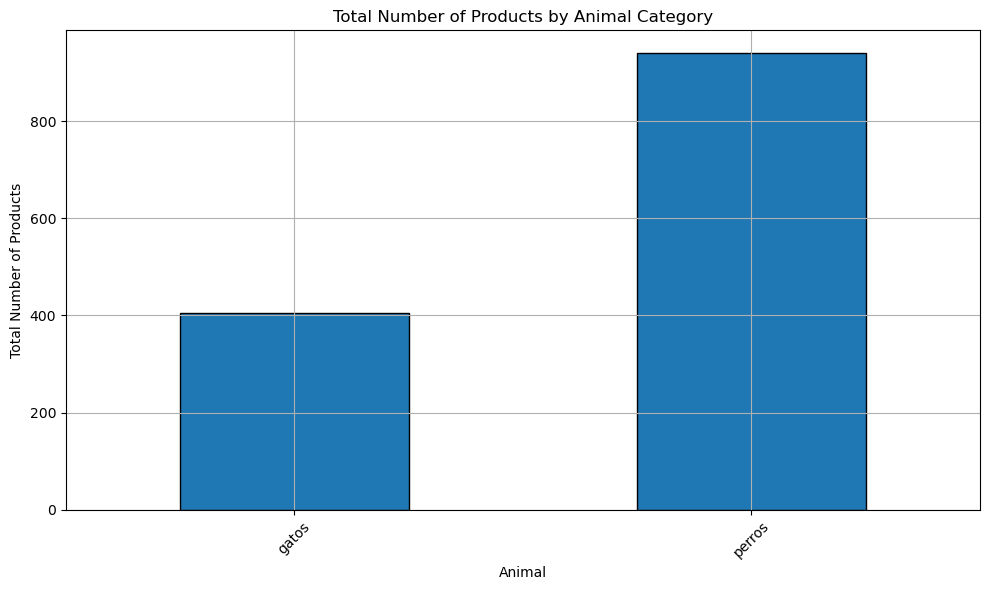

In [19]:
product_counts_by_animal = df.groupby('animal').size()

# Bar graph
plt.figure(figsize=(10, 6))
product_counts_by_animal.plot(kind='bar', edgecolor='black')
plt.xlabel('Animal')
plt.ylabel('Total Number of Products')
plt.title('Total Number of Products by Animal Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Total number of products by type of food

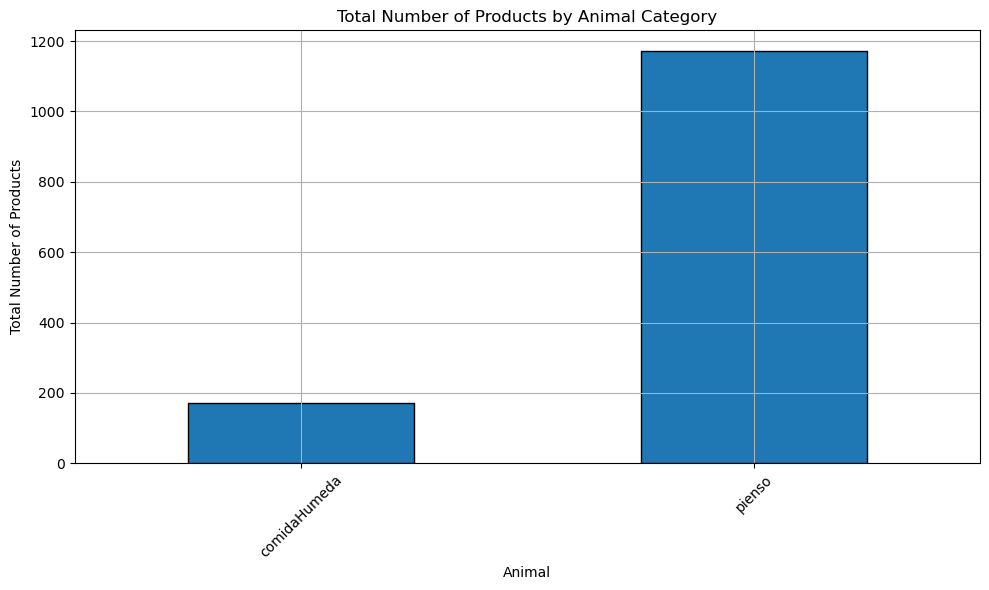

In [20]:
product_counts_by_animal = df.groupby('food_type').size()

plt.figure(figsize=(10, 6))
product_counts_by_animal.plot(kind='bar', edgecolor='black')
plt.xlabel('Animal')
plt.ylabel('Total Number of Products')
plt.title('Total Number of Products by Animal Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

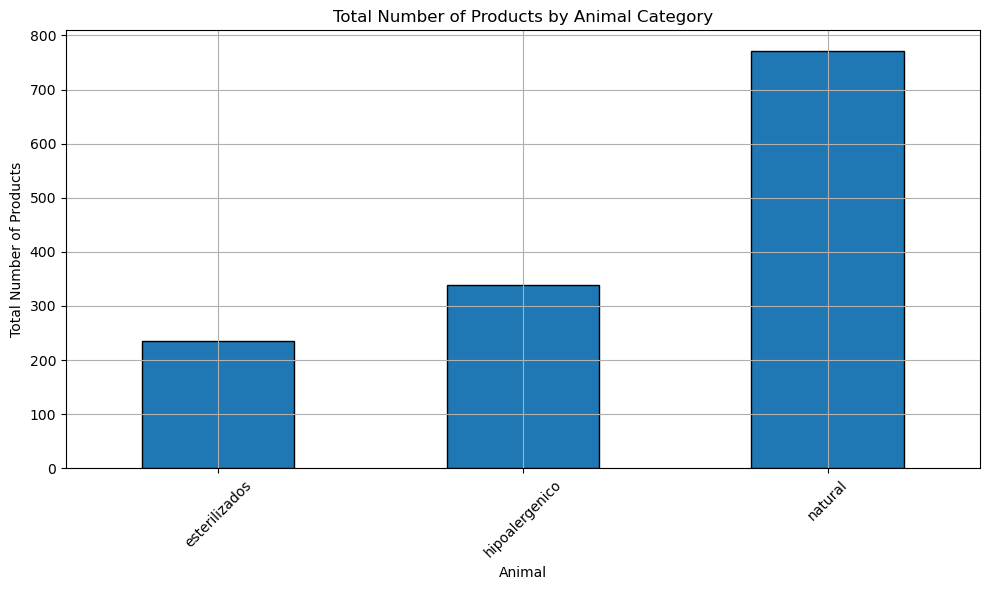

In [21]:
product_counts_by_animal = df.groupby('subcategory').size()

plt.figure(figsize=(10, 6))
product_counts_by_animal.plot(kind='bar', edgecolor='black')
plt.xlabel('Animal')
plt.ylabel('Total Number of Products')
plt.title('Total Number of Products by Animal Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##  Weight distribution

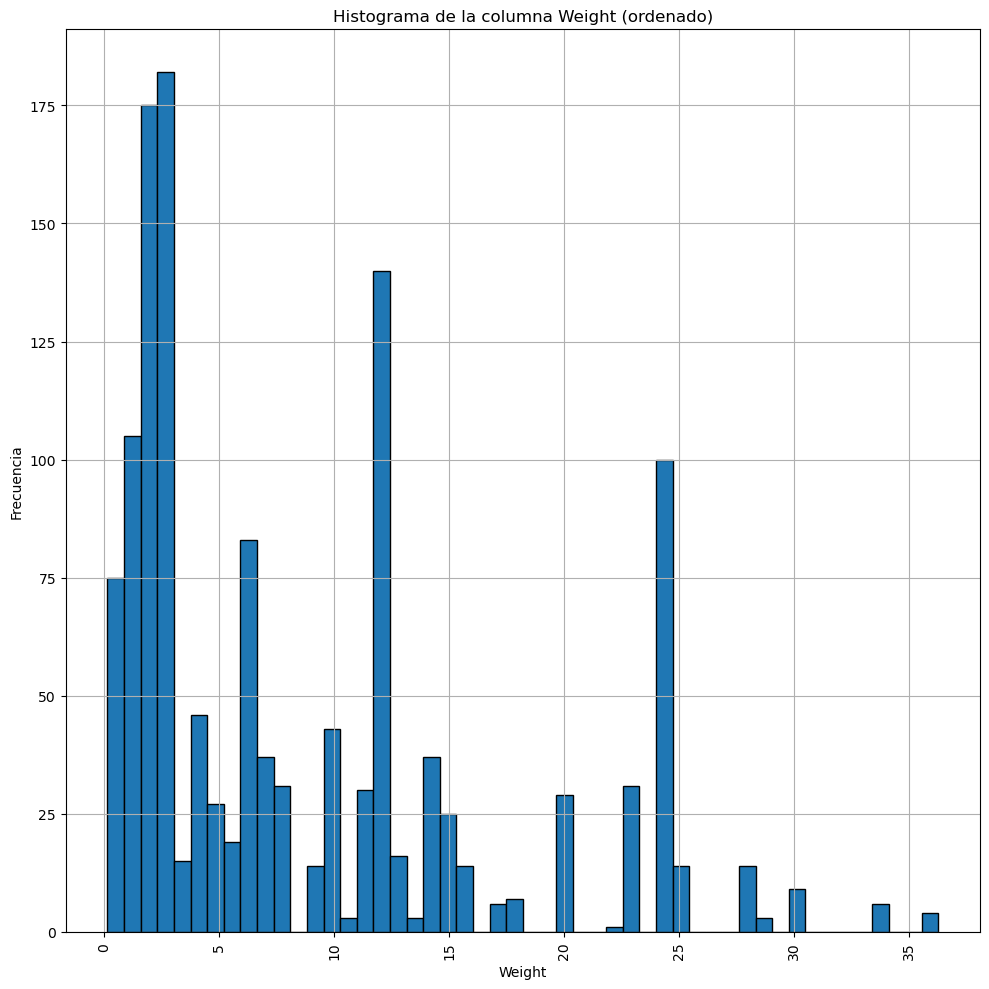

In [22]:
# Histogram
df_sorted = df.sort_values(by='Weight')

plt.figure(figsize=(10, 10))
plt.hist(df_sorted['Weight'], bins=50, edgecolor='black')
plt.title('Histograma de la columna Weight (ordenado)')
plt.xlabel('Weight')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


We can see the lower the weight, the less amount of products are sold.

### Weight distribution by animal category

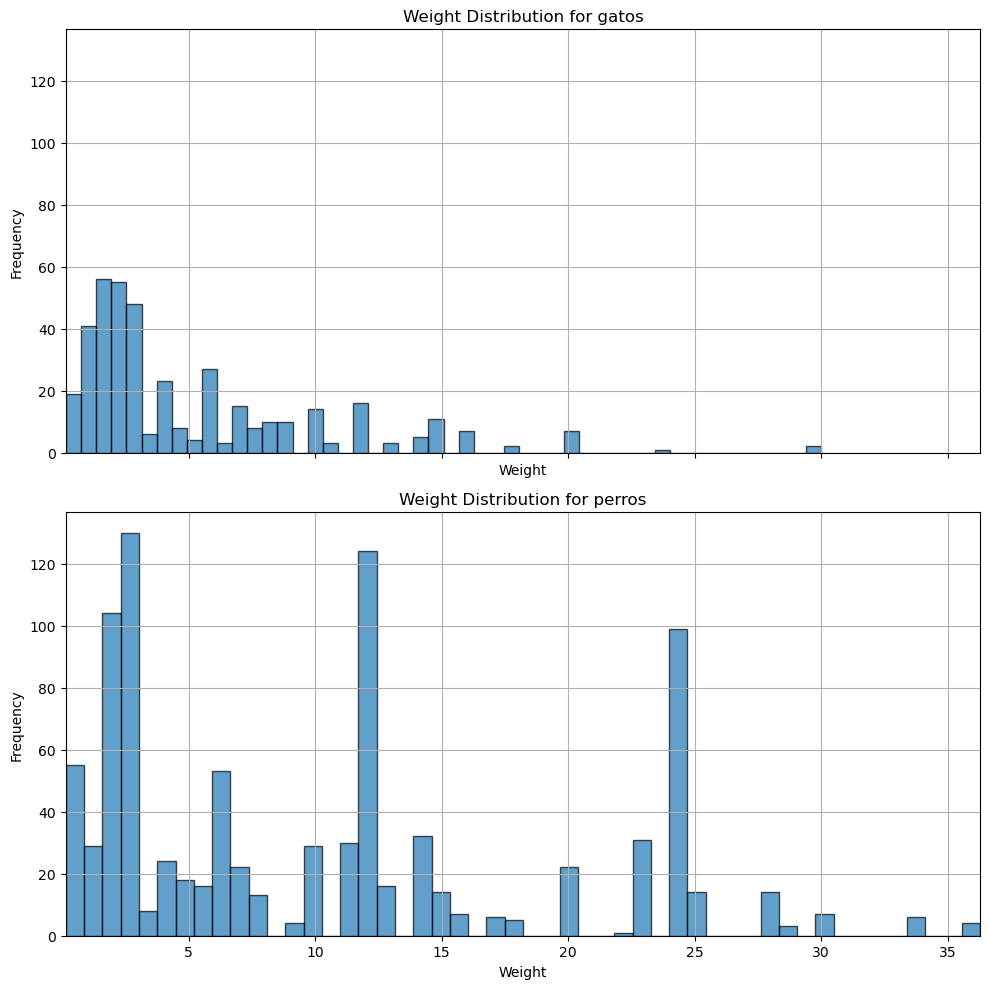

In [23]:
# Get unique animal categories
animal_categories = df['animal'].unique()
fig, axes = plt.subplots(nrows=len(animal_categories), ncols=1, figsize=(10, 10), sharex=True, sharey=True)

# Histogram
for ax, animal in zip(axes, animal_categories):
    subset = df[df['animal'] == animal]
    ax.hist(subset['Weight'].dropna(), bins=50, edgecolor='black', alpha=0.7)
    ax.set_title(f'Weight Distribution for {animal}')
    ax.set_xlabel('Weight')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    ax.set_xlim(df['Weight'].min(), df['Weight'].max())

plt.tight_layout()
plt.show()

## Price distribution

In [24]:
df.shape

(1344, 13)

### Food price by animal

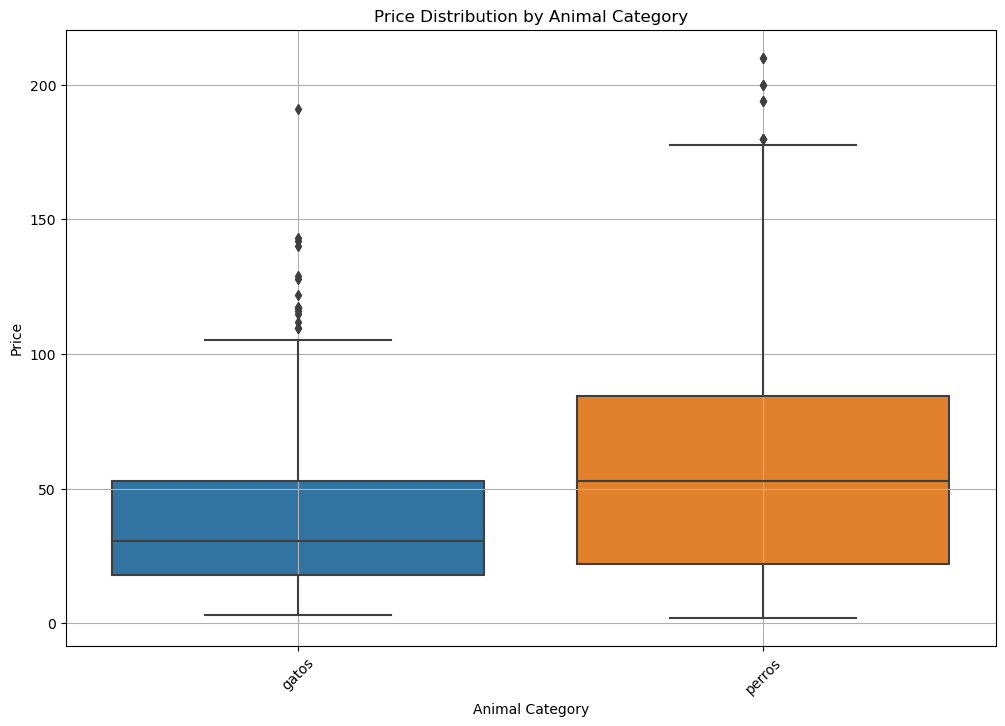

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='animal', y='Price', data=df)
plt.xlabel('Animal Category')
plt.ylabel('Price')
plt.title('Price Distribution by Animal Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

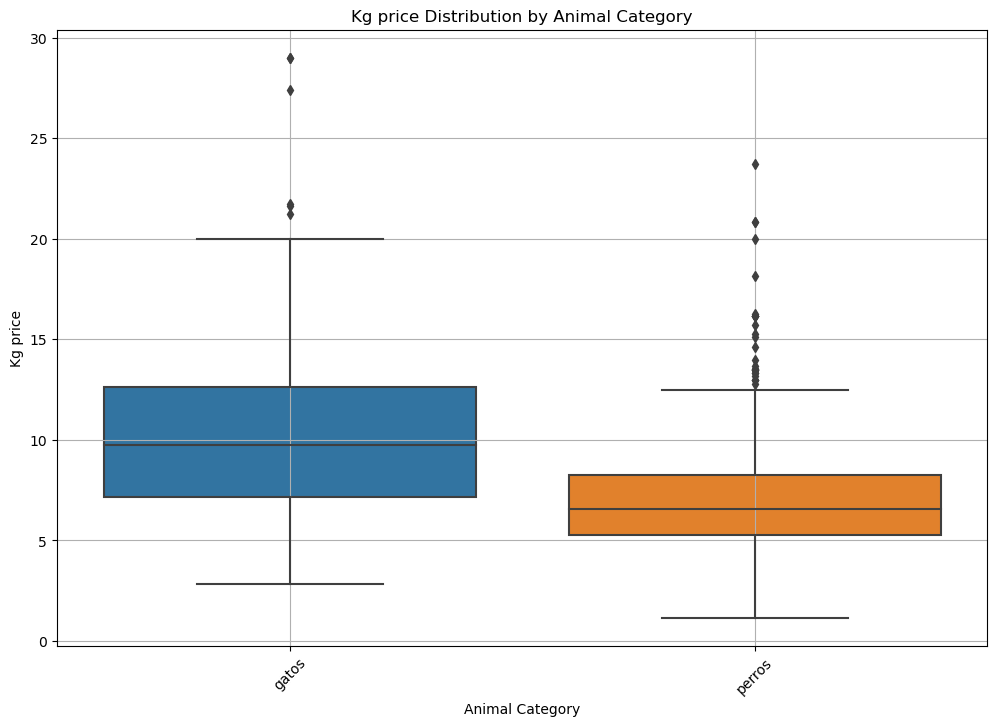

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='animal', y='Kg price', data=df)
plt.xlabel('Animal Category')
plt.ylabel('Kg price')
plt.title('Kg price Distribution by Animal Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Percentejes of food type by animal category

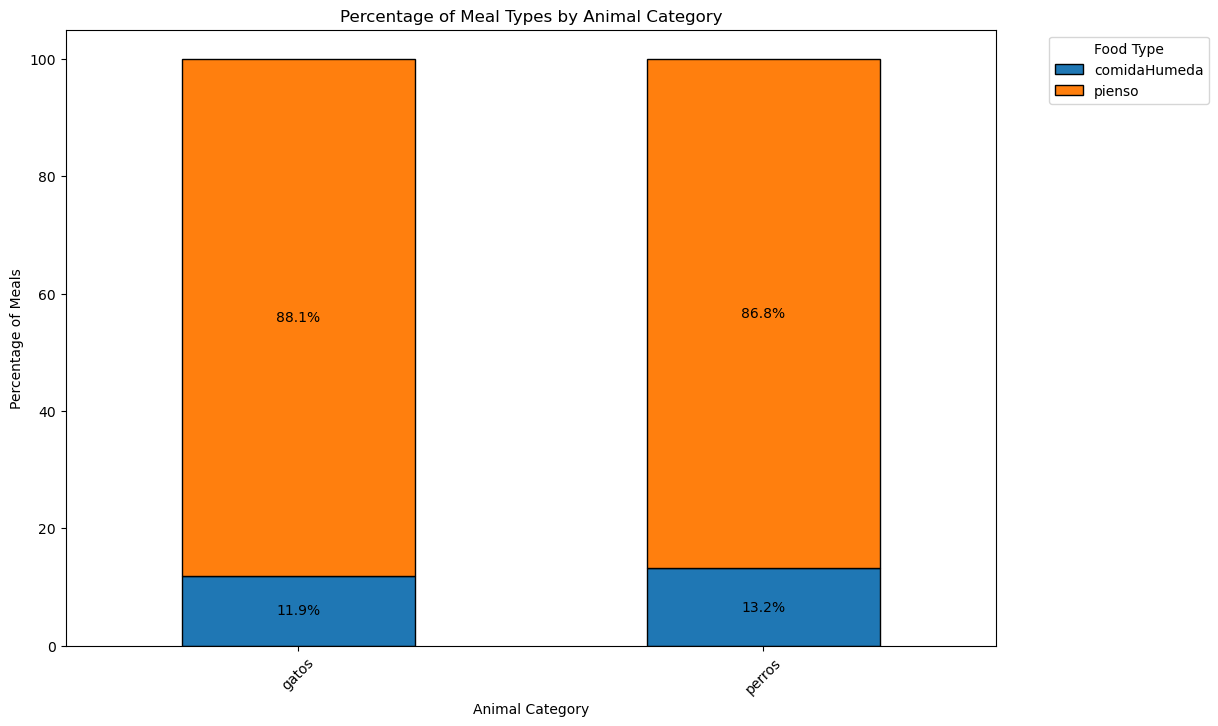

In [29]:
grouped_data = df.groupby(['animal', 'food_type']).size().unstack(fill_value=0)
grouped_data_percent = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
ax = grouped_data_percent.plot(kind='bar', stacked=True, figsize=(12, 8), edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.xlabel('Animal Category')
plt.ylabel('Percentage of Meals')
plt.title('Percentage of Meal Types by Animal Category')
plt.xticks(rotation=45)
plt.legend(title='Food Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Price distribution by subcategory

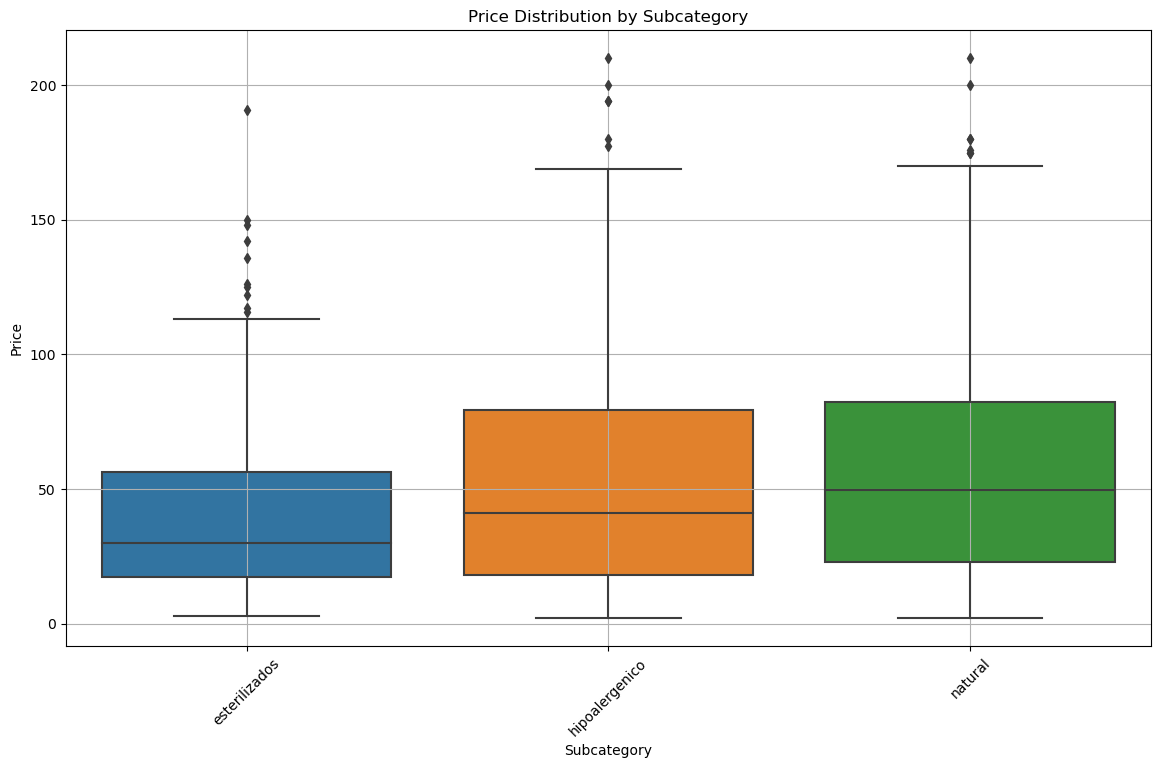

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='subcategory', y='Price', data=df)
plt.xlabel('Subcategory')
plt.ylabel('Price')
plt.title('Price Distribution by Subcategory')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

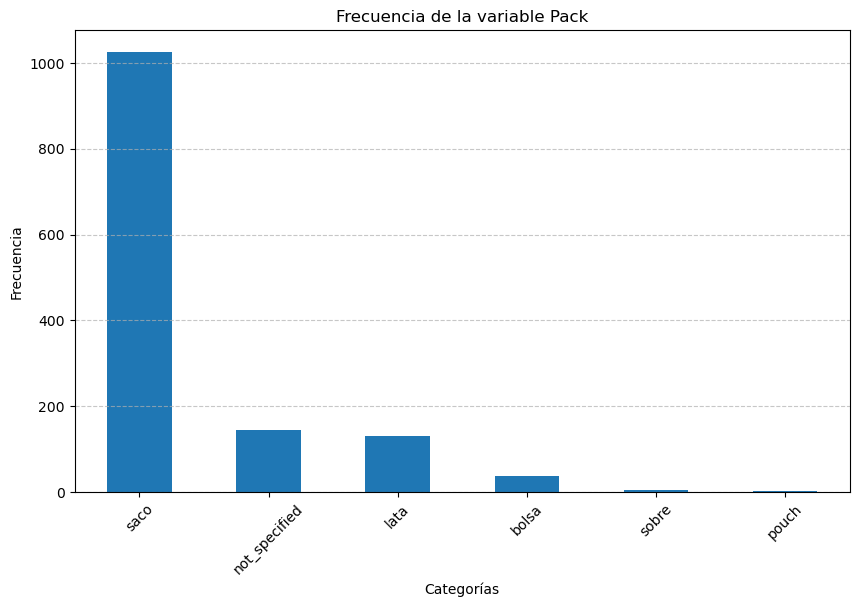

In [34]:
plt.figure(figsize=(10, 6))
df['Package'].value_counts().plot(kind='bar')
plt.title('Frecuencia de la variable Pack')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()